# HW1

# UCI's breast cancer dataset (<a href="https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Original%29" target="_blank">Link</a>)


## 0. Data Engineering (Data Preparation)

#### Importing the libraries

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Importing the dataset

In [36]:
df = pd.read_csv('Data.csv')
x = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

In [37]:
df

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
678,776715,3,1,1,1,3,2,1,1,1,2
679,841769,2,1,1,1,2,1,1,1,1,2
680,888820,5,10,10,3,7,3,8,10,2,4
681,897471,4,8,6,4,3,4,10,6,1,4


In [38]:
x

array([[ 5,  1,  1, ...,  3,  1,  1],
       [ 5,  4,  4, ...,  3,  2,  1],
       [ 3,  1,  1, ...,  3,  1,  1],
       ...,
       [ 5, 10, 10, ...,  8, 10,  2],
       [ 4,  8,  6, ..., 10,  6,  1],
       [ 4,  8,  8, ..., 10,  4,  1]], dtype=int64)

In [39]:
y # Class: (2 for benign, 4 for malignant)

array([2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 4, 4,
       2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 4, 4, 4, 4, 2,
       4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4, 2, 4,
       4, 2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4, 2, 4,
       4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2, 4, 2,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2,
       4, 4, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2,
       2, 4, 4, 2, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2,
       2, 4, 4, 2, 2, 2, 4, 4, 2, 4, 4, 4, 2, 2, 4, 2, 2, 4, 4, 4, 4, 2,
       4, 4, 2, 4, 4, 4, 2, 4, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2,
       2, 4, 2, 4, 4, 4, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 4, 2, 4, 2,
       4, 4, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 2, 2, 4, 4, 2,
       2, 4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 4,

#### Dealing with missing values

In [40]:
df.isnull().sum().sum()

0

#### Splitting the dataset into the Training set and Test set

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [42]:
print(df.shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(683, 11)
(512, 9)
(171, 9)
(512,)
(171,)


#### Feature scaling

In [43]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [44]:
x_train

array([[ 0.91903747,  0.9407658 ,  2.30881719, ...,  2.22576767,
         2.27129602,  0.24623928],
       [ 1.27578287, -0.04290763,  1.63138773, ...,  1.82407819,
         1.94996317,  3.74830911],
       [ 1.27578287,  2.25233038,  2.30881719, ...,  2.62745714,
         2.27129602, -0.33743902],
       ...,
       [-1.22143494, -0.69868992, -0.73961536, ..., -0.98774815,
        -0.62069958, -0.33743902],
       [-0.50794414, -0.69868992, -0.73961536, ..., -0.58605867,
        -0.62069958, -0.33743902],
       [ 1.98927367,  1.92443923,  1.29267301, ...,  1.42238871,
         1.30729749, -0.33743902]])

## 1. Decision Tree Classification Model

#### Model implementation

In [45]:
from sklearn.tree import DecisionTreeClassifier

classifier_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

#### Predicting the Test set results

In [46]:
y_pred = classifier_tree.predict(x_test)
np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), axis = 1)

array([[2, 2],
       [2, 2],
       [4, 4],
       [4, 4],
       [2, 2],
       [2, 2],
       [2, 2],
       [4, 4],
       [2, 2],
       [2, 2],
       [4, 4],
       [2, 2],
       [4, 4],
       [2, 2],
       [2, 2],
       [2, 2],
       [4, 4],
       [4, 4],
       [4, 4],
       [2, 2],
       [2, 2],
       [2, 2],
       [4, 4],
       [2, 2],
       [4, 4],
       [4, 4],
       [2, 2],
       [2, 2],
       [2, 2],
       [4, 4],
       [2, 2],
       [4, 4],
       [4, 4],
       [2, 2],
       [2, 2],
       [2, 2],
       [4, 4],
       [4, 4],
       [2, 2],
       [4, 4],
       [2, 2],
       [2, 2],
       [2, 2],
       [2, 2],
       [2, 2],
       [2, 2],
       [2, 2],
       [4, 4],
       [2, 2],
       [2, 2],
       [4, 4],
       [2, 2],
       [4, 4],
       [2, 2],
       [2, 2],
       [2, 2],
       [4, 4],
       [4, 2],
       [2, 2],
       [4, 4],
       [2, 2],
       [2, 2],
       [2, 2],
       [2, 2],
       [2, 2],
       [2, 2],
       [2,

#### Evaluating the model (Confusion Matrix)

In [47]:
#Accuracy metric:

from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)

print(cm)
print(ac)

[[104   3]
 [  4  60]]
0.9590643274853801


In [48]:
#Thus, Decision Tree model accuracy is 95.9%.

In [49]:
#Precision metric:

from sklearn.metrics import precision_score

ps = precision_score(y_test, y_pred, average = 'macro')
print(ps)

0.9576719576719577


In [50]:
#Thus, Decision Tree model precision is 95.7%.

In [51]:
#AUC metric: (also the ROC curve)

from sklearn.metrics import roc_curve, auc, roc_auc_score

roc_auc_metric = roc_auc_score(y_test, y_pred)
print(roc_auc_metric)

0.9547313084112149


In [52]:
#Thus, Decision Tree model roc_auc metricis 0.954, whic is quite high!

## 2. Support Vector Machine Classification Model (Kernel SVM)

#### Model implementation

In [53]:
from sklearn.svm import SVC

classifier_svc = SVC(kernel = 'rbf', random_state = 0)
classifier_svc.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

#### Predicting the Test set results

In [54]:
y_pred = classifier_svc.predict(x_test)
np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), axis = 1)

array([[2, 2],
       [2, 2],
       [4, 4],
       [4, 4],
       [2, 2],
       [2, 2],
       [2, 2],
       [4, 4],
       [2, 2],
       [2, 2],
       [4, 4],
       [2, 2],
       [4, 4],
       [2, 2],
       [2, 2],
       [4, 2],
       [4, 4],
       [4, 4],
       [4, 4],
       [2, 2],
       [2, 2],
       [2, 2],
       [4, 4],
       [2, 2],
       [4, 4],
       [4, 4],
       [2, 2],
       [2, 2],
       [2, 2],
       [4, 4],
       [2, 2],
       [4, 4],
       [4, 4],
       [2, 2],
       [2, 2],
       [2, 2],
       [4, 4],
       [4, 4],
       [2, 2],
       [4, 4],
       [2, 2],
       [2, 2],
       [2, 2],
       [2, 2],
       [2, 2],
       [2, 2],
       [2, 2],
       [4, 4],
       [2, 2],
       [2, 2],
       [4, 4],
       [2, 2],
       [4, 4],
       [2, 2],
       [2, 2],
       [2, 2],
       [4, 4],
       [4, 2],
       [2, 2],
       [4, 4],
       [2, 2],
       [2, 2],
       [2, 2],
       [2, 2],
       [2, 2],
       [2, 2],
       [2,

#### Evaluating the model (Confusion Matrix)

In [55]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)

print(cm)
print(ac)

[[101   6]
 [  3  61]]
0.9473684210526315


In [56]:
#Thus, Kernel SVM model accuracy is 94.7%.

In [57]:
#Precision metric:

from sklearn.metrics import precision_score

ps = precision_score(y_test, y_pred, average = 'macro')
print(ps)

0.9408008036739379


In [58]:
#Thus, Kernel SVM model precision is 94%.

In [59]:
#AUC metric: (also the ROC curve)

from sklearn.metrics import roc_curve, auc, roc_auc_score

roc_auc_metric = roc_auc_score(y_test, y_pred)
print(roc_auc_metric)

0.9485251168224299


In [60]:
#Thus, Kernel SVM model auc_roc metric is 0.948%.

## 3. Neural Network Model (ANN)

#### Data Engineering

In [160]:
df = pd.read_csv('Data.csv')
x = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

In [161]:
y

array([2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 4, 4,
       2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 4, 4, 4, 4, 2,
       4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4, 2, 4,
       4, 2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4, 2, 4,
       4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2, 4, 2,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2,
       4, 4, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2,
       2, 4, 4, 2, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2,
       2, 4, 4, 2, 2, 2, 4, 4, 2, 4, 4, 4, 2, 2, 4, 2, 2, 4, 4, 4, 4, 2,
       4, 4, 2, 4, 4, 4, 2, 4, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2,
       2, 4, 2, 4, 4, 4, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 4, 2, 4, 2,
       4, 4, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 2, 2, 4, 4, 2,
       2, 4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 4,

#### Label Encoding the target variable "y"

In [162]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y) #So, "2" -> "0" And "4" -> "1"

In [163]:
y

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,

#### Splitting the dataset into the Training set and Test set

In [164]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

#### Feature Scaling

In [165]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#### Model architecture

In [166]:
import tensorflow as tf

In [167]:
from tensorflow.keras.models import Sequential

ann = Sequential()

In [168]:
from tensorflow.keras.layers import Dense

ann.add(Dense(units = 10, activation = 'relu'))
ann.add(Dense(units = 10, activation = 'relu'))

In [169]:
ann.add(Dense(units = 1, activation = 'sigmoid'))

#### Compiling the model

In [170]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'], random_state = 0)

#### Earlystopping

In [171]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor = 'val_los', patience = 1)

#### Fitting the model

In [172]:
ann.fit(x_train, y_train, epochs = 20, validation_data = [x_test, y_test], callbacks = [early_stop])

Train on 512 samples, validate on 171 samples
Epoch 1/20
512/512 [==============================] - 0s 449us/sample - loss: 0.7878 - acc: 0.1426 - val_loss: 0.7444 - val_acc: 0.2164
Epoch 2/20
512/512 [==============================] - 0s 74us/sample - loss: 0.7162 - acc: 0.3086 - val_loss: 0.6813 - val_acc: 0.5556
Epoch 3/20
512/512 [==============================] - 0s 88us/sample - loss: 0.6575 - acc: 0.7012 - val_loss: 0.6283 - val_acc: 0.8421
Epoch 4/20
512/512 [==============================] - 0s 70us/sample - loss: 0.6067 - acc: 0.8691 - val_loss: 0.5783 - val_acc: 0.8830
Epoch 5/20
512/512 [==============================] - 0s 88us/sample - loss: 0.5551 - acc: 0.9375 - val_loss: 0.5249 - val_acc: 0.9240
Epoch 6/20
512/512 [==============================] - 0s 115us/sample - loss: 0.4989 - acc: 0.9434 - val_loss: 0.4668 - val_acc: 0.9415
Epoch 7/20
512/512 [==============================] - 0s 94us/sample - loss: 0.4387 - acc: 0.9551 - val_loss: 0.4051 - val_acc: 0.9532
Epoch 8

In [173]:
metrics_general = pd.DataFrame(ann.history.history)

metrics_general

,loss,acc,val_loss,val_acc
0,0.787795,0.142578,0.744429,0.216374
1,0.716188,0.308594,0.681340,0.555556
2,0.657532,0.701172,0.628280,0.842105
3,0.606735,0.869141,0.578335,0.883041
4,0.555112,0.937500,0.524863,0.923977
5,0.498929,0.943359,0.466778,0.941520
6,0.438707,0.955078,0.405126,0.953216
7,0.376532,0.962891,0.344513,0.953216
8,0.317678,0.966797,0.291026,0.959064
9,0.266170,0.968750,0.246819,0.953216


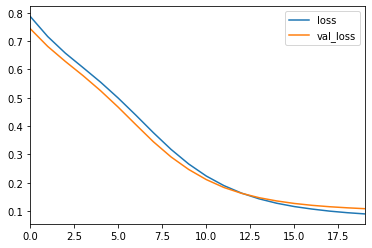

In [174]:
metrics_general[['loss', 'val_loss']].plot() #So, no overfitting has happened.

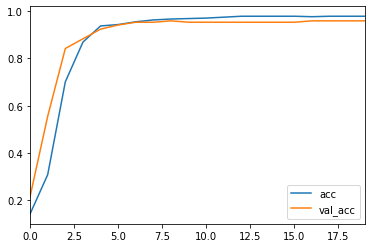

In [175]:
metrics_general[['acc', 'val_acc']].plot()

#### Evaluating the model

In [176]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred = ann.predict(x_test)
y_pred = (y_pred > 0.5)

In [177]:
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), axis = 1))

[[0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]

In [178]:
from sklearn.metrics import accuracy_score, confusion_matrix

cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)

print(cm)
print(ac)

[[103   4]
 [  3  61]]
0.9590643274853801


In [179]:
#Thus, ANN model accuracy is 95.9%.

In [180]:
#Precision metric:

from sklearn.metrics import precision_score

ps = precision_score(y_test, y_pred, average = 'macro')
print(ps)

0.9550798258345428


In [181]:
#Thus, ANN model precision is 95.5%.

In [182]:
#AUC metric: (also the ROC curve)

from sklearn.metrics import roc_curve, auc, roc_auc_score

roc_auc_metric = roc_auc_score(y_test, y_pred)
print(roc_auc_metric)

0.9578709112149533


In [183]:
#Thus, ANN model auc_roc is 0.95.7%.